In [1]:
import glob 
import numpy as np 
import os 
import shutil 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator,  load_img, img_to_array, array_to_img 
np.random.seed(42) 
from keras.applications.imagenet_utils import preprocess_input

import matplotlib.pyplot as plt 

In [2]:
IM_SHAPE=(600,450)
input_shape=(IM_SHAPE[0],IM_SHAPE[1],3)

In [3]:
batch_size = 32
num_classes = 2 
epochs = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                    preprocessing_function=preprocess_input,
                                      validation_split=0.3)
val_datagen=ImageDataGenerator(rescale=1./255,
                               preprocessing_function=preprocess_input,
                                      validation_split=0.09)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/hecto/Downloads/MachineCrypto/Proyecto/dataset',
    target_size=IM_SHAPE,

    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False) # set as training data

# validation_generator = train_datagen.flow_from_directory(
#     'C:/Users/hecto/Downloads/MachineCrypto/Proyecto/dataset', # same directory as training data
#     target_size=IM_SHAPE,
#     subset='validation',
#     batch_size=batch_size,
#     class_mode='categorical') # set as validation data
test_generator= val_datagen.flow_from_directory(
    'D:/dataset/ALL',
    batch_size=16,
    subset='validation',
    class_mode='categorical',
    target_size=IM_SHAPE,
    shuffle=False
)

Found 269 images belonging to 2 classes.
Found 2039 images belonging to 2 classes.


In [4]:
from keras.applications import DenseNet121
from keras.models import Model 
import keras 
 
vgg = DenseNet121(include_top=False, weights='imagenet',  
                                     input_shape=input_shape) 

# we have removed the final part of the classifier pertaining to the VGG-16 model 
#since we will be building our own classifier and leveraging VGG as a feature extractor
output = vgg.layers[-1].output 
output = keras.layers.Flatten()(output) 
vgg_model = Model(vgg.input, output) 
vgg_model.trainable = False 
 
for layer in vgg_model.layers: 
    layer.trainable = False 

vgg_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 600, 450, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 606, 456, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 300, 225, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

 conv2_block3_concat (Concatena  (None, 150, 113, 16  0          ['conv2_block2_concat[0][0]',    
 te)                            0)                                'conv2_block3_2_conv[0][0]']    
                                                                                                  
 conv2_block4_0_bn (BatchNormal  (None, 150, 113, 16  640        ['conv2_block3_concat[0][0]']    
 ization)                       0)                                                                
                                                                                                  
 conv2_block4_0_relu (Activatio  (None, 150, 113, 16  0          ['conv2_block4_0_bn[0][0]']      
 n)                             0)                                                                
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 150, 113, 12  20480       ['conv2_block4_0_relu[0][0]']    
          

 conv3_block1_1_conv (Conv2D)   (None, 75, 56, 128)  16384       ['conv3_block1_0_relu[0][0]']    
                                                                                                  
 conv3_block1_1_bn (BatchNormal  (None, 75, 56, 128)  512        ['conv3_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block1_1_relu (Activatio  (None, 75, 56, 128)  0          ['conv3_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block1_2_conv (Conv2D)   (None, 75, 56, 32)   36864       ['conv3_block1_1_relu[0][0]']    
                                                                                                  
 conv3_blo

                                                                                                  
 conv3_block5_2_conv (Conv2D)   (None, 75, 56, 32)   36864       ['conv3_block5_1_relu[0][0]']    
                                                                                                  
 conv3_block5_concat (Concatena  (None, 75, 56, 288)  0          ['conv3_block4_concat[0][0]',    
 te)                                                              'conv3_block5_2_conv[0][0]']    
                                                                                                  
 conv3_block6_0_bn (BatchNormal  (None, 75, 56, 288)  1152       ['conv3_block5_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block6_0_relu (Activatio  (None, 75, 56, 288)  0          ['conv3_block6_0_bn[0][0]']      
 n)       

 lization)                                                                                        
                                                                                                  
 conv3_block10_0_relu (Activati  (None, 75, 56, 416)  0          ['conv3_block10_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block10_1_conv (Conv2D)  (None, 75, 56, 128)  53248       ['conv3_block10_0_relu[0][0]']   
                                                                                                  
 conv3_block10_1_bn (BatchNorma  (None, 75, 56, 128)  512        ['conv3_block10_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_blo

 conv4_block2_0_bn (BatchNormal  (None, 37, 28, 288)  1152       ['conv4_block1_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_0_relu (Activatio  (None, 37, 28, 288)  0          ['conv4_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_1_conv (Conv2D)   (None, 37, 28, 128)  36864       ['conv4_block2_0_relu[0][0]']    
                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 37, 28, 128)  512        ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block6_1_bn (BatchNormal  (None, 37, 28, 128)  512        ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 37, 28, 128)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 37, 28, 32)   36864       ['conv4_block6_1_relu[0][0]']    
                                                                                                  
 conv4_block6_concat (Concatena  (None, 37, 28, 448)  0          ['conv4_block5_concat[0][0]',    
 te)      

 conv4_block10_2_conv (Conv2D)  (None, 37, 28, 32)   36864       ['conv4_block10_1_relu[0][0]']   
                                                                                                  
 conv4_block10_concat (Concaten  (None, 37, 28, 576)  0          ['conv4_block9_concat[0][0]',    
 ate)                                                             'conv4_block10_2_conv[0][0]']   
                                                                                                  
 conv4_block11_0_bn (BatchNorma  (None, 37, 28, 576)  2304       ['conv4_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block11_0_relu (Activati  (None, 37, 28, 576)  0          ['conv4_block11_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block15_0_relu (Activati  (None, 37, 28, 704)  0          ['conv4_block15_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block15_1_conv (Conv2D)  (None, 37, 28, 128)  90112       ['conv4_block15_0_relu[0][0]']   
                                                                                                  
 conv4_block15_1_bn (BatchNorma  (None, 37, 28, 128)  512        ['conv4_block15_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block15_1_relu (Activati  (None, 37, 28, 128)  0          ['conv4_block15_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block19_1_relu (Activati  (None, 37, 28, 128)  0          ['conv4_block19_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block19_2_conv (Conv2D)  (None, 37, 28, 32)   36864       ['conv4_block19_1_relu[0][0]']   
                                                                                                  
 conv4_block19_concat (Concaten  (None, 37, 28, 864)  0          ['conv4_block18_concat[0][0]',   
 ate)                                                             'conv4_block19_2_conv[0][0]']   
                                                                                                  
 conv4_blo

 conv4_block23_concat (Concaten  (None, 37, 28, 992)  0          ['conv4_block22_concat[0][0]',   
 ate)                                                             'conv4_block23_2_conv[0][0]']   
                                                                                                  
 conv4_block24_0_bn (BatchNorma  (None, 37, 28, 992)  3968       ['conv4_block23_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block24_0_relu (Activati  (None, 37, 28, 992)  0          ['conv4_block24_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block24_1_conv (Conv2D)  (None, 37, 28, 128)  126976      ['conv4_block24_0_relu[0][0]']   
          

                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, 18, 14, 32)   36864       ['conv5_block3_1_relu[0][0]']    
                                                                                                  
 conv5_block3_concat (Concatena  (None, 18, 14, 608)  0          ['conv5_block2_concat[0][0]',    
 te)                                                              'conv5_block3_2_conv[0][0]']    
                                                                                                  
 conv5_block4_0_bn (BatchNormal  (None, 18, 14, 608)  2432       ['conv5_block3_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block4_0_relu (Activatio  (None, 18, 14, 608)  0          ['conv5_block4_0_bn[0][0]']      
 n)       

 ization)                                                                                         
                                                                                                  
 conv5_block8_0_relu (Activatio  (None, 18, 14, 736)  0          ['conv5_block8_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block8_1_conv (Conv2D)   (None, 18, 14, 128)  94208       ['conv5_block8_0_relu[0][0]']    
                                                                                                  
 conv5_block8_1_bn (BatchNormal  (None, 18, 14, 128)  512        ['conv5_block8_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_blo

 conv5_block12_1_bn (BatchNorma  (None, 18, 14, 128)  512        ['conv5_block12_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block12_1_relu (Activati  (None, 18, 14, 128)  0          ['conv5_block12_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block12_2_conv (Conv2D)  (None, 18, 14, 32)   36864       ['conv5_block12_1_relu[0][0]']   
                                                                                                  
 conv5_block12_concat (Concaten  (None, 18, 14, 896)  0          ['conv5_block11_concat[0][0]',   
 ate)                                                             'conv5_block12_2_conv[0][0]']   
          

                                                                                                  
 conv5_block16_concat (Concaten  (None, 18, 14, 1024  0          ['conv5_block15_concat[0][0]',   
 ate)                           )                                 'conv5_block16_2_conv[0][0]']   
                                                                                                  
 bn (BatchNormalization)        (None, 18, 14, 1024  4096        ['conv5_block16_concat[0][0]']   
                                )                                                                 
                                                                                                  
 relu (Activation)              (None, 18, 14, 1024  0           ['bn[0][0]']                     
                                )                                                                 
                                                                                                  
 flatten (

In [5]:
# To verify that the layers of the VGG-16 model are frozen, we can use the following code:
import pandas as pd 
pd.set_option('max_colwidth', -1) 
 
layers = [(layer, layer.name, layer.trainable) for layer in 
           vgg_model.layers] 
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

C:\Users\hecto\AppData\Local\Temp\ipykernel_17644\1885812186.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000002DDEC195F10>,input_1,False
1,<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x000002DDEC180F40>,zero_padding2d,False
2,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002DDCAB93FA0>,conv1/conv,False
3,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000002DDEC19C0D0>,conv1/bn,False
4,<keras.layers.core.activation.Activation object at 0x000002DDCAB69190>,conv1/relu,False
...,...,...,...
423,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002DD8B7659D0>,conv5_block16_2_conv,False
424,<keras.layers.merging.concatenate.Concatenate object at 0x000002DD8B7438E0>,conv5_block16_concat,False
425,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000002DD8B6A2C10>,bn,False
426,<keras.layers.core.activation.Activation object at 0x000002DD8B743550>,relu,False


In [6]:
print("Trainable layers:", vgg_model.trainable_weights)


Trainable layers: []


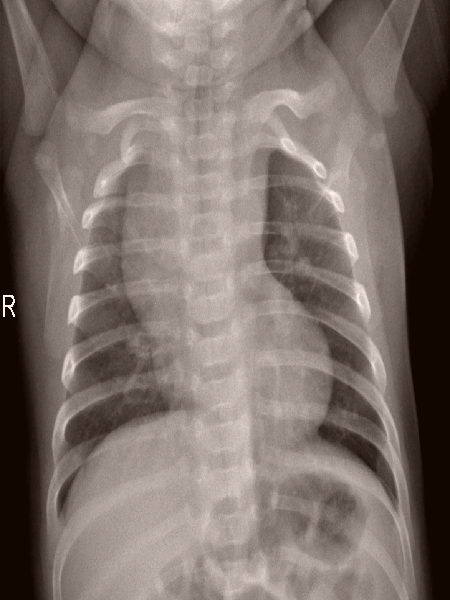

In [7]:
array_to_img(train_generator[0][0][0])

1/1 [==============================] - 7s 7s/step
(32, 18, 14, 1024)


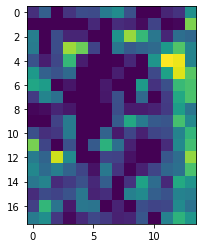

In [8]:
bottleneck_feature_example = vgg.predict(train_generator[0][0])
print(bottleneck_feature_example.shape) 
plt.imshow(bottleneck_feature_example[0][:,:,0]) 

In [9]:
def get_bottleneck_features(model, input_imgs): 
    features = model.predict(input_imgs, verbose=1) 
    return features 

train_features_vgg = get_bottleneck_features(vgg_model, 
                                             train_generator) 
#validation_features_vgg = get_bottleneck_features(vgg_model,      
 #                                               validation_generator) 

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:')#, validation_features_vgg.shape) 

9/9 [==============================] - 10s 1s/step
Train Bottleneck Features: (269, 258048) 	Validation Bottleneck Features:


In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

In [11]:
X_train=train_features_vgg
y_train=train_generator.labels
#X_valid=validation_features_vgg
#y_valid=validation_generator.labels


In [12]:
scores = cross_validate(BaggingClassifier(
base_estimator=DecisionTreeClassifier(),
n_estimators=5
), X_train ,y_train, cv=10,scoring=('accuracy','recall','precision','f1'), return_train_score=True)
#print("%0.2f accuracy with a standard deviation of %0.2f"  (scores.mean(), scores.std()))
print('Tiempo de entrenamiento: ',scores['fit_time'].mean())
print('Accuracy: ',scores['test_accuracy'].mean())
print('Recall: ',scores['test_recall'].mean())
print('Precision: ',scores['test_precision'].mean())
print('F1-score: ',scores['test_f1'].mean())


Tiempo de entrenamiento:  20.416874861717226
Accuracy:  0.9481481481481481
Recall:  0.962087912087912
Precision:  0.9351648351648352
F1-score:  0.9479234558544902


In [13]:
scores = cross_validate(RandomForestClassifier(n_estimators=5), X_train ,y_train, cv=10,scoring=('accuracy','recall','precision','f1'),return_train_score=True,return_estimator=True)
#print("%0.2f accuracy with a standard deviation of %0.2f"  (scores.mean(), scores.std()))
print('Tiempo de entrenamiento: ',scores['fit_time'].mean())
print('Accuracy: ',scores['test_accuracy'].mean())
print('Recall: ',scores['test_recall'].mean())
print('Precision: ',scores['test_precision'].mean())
print('F1-score: ',scores['test_f1'].mean())

Tiempo de entrenamiento:  0.18719942569732667
Accuracy:  0.9441595441595443
Recall:  0.962087912087912
Precision:  0.9313273001508297
F1-score:  0.9448871603821549


In [14]:
scores = cross_validate(XGBClassifier(), X_train ,y_train, cv=10,scoring=('accuracy','recall','precision','f1'))
#print("%0.2f accuracy with a standard deviation of %0.2f"  (scores.mean(), scores.std()))
print('Tiempo de entrenamiento: ',scores['fit_time'].mean())
print('Accuracy: ',scores['test_accuracy'].mean())
print('Recall: ',scores['test_recall'].mean())
print('Precision: ',scores['test_precision'].mean())
print('F1-score: ',scores['test_f1'].mean())

Tiempo de entrenamiento:  28.93540780544281
Accuracy:  0.9740740740740741
Recall:  0.9857142857142858
Precision:  0.9675
F1-score:  0.975581098339719


In [15]:
# scores = cross_validate(LGBMClassifier(n_estimators=1000,class_weight='balanced',
#                                        reg_alpha=0.1,reg_lambda=0.1,
#                                        learning_rate=0.001,num_leaves=400,boosting='dart'
# ), X_train ,y_train, cv=10,scoring=('accuracy','recall','precision','f1'))
# print('Tiempo de entrenamiento: ',scores['fit_time'].mean())
# print('Accuracy: ',scores['test_accuracy'].mean())
# print('Recall: ',scores['test_recall'].mean())
# print('Precision: ',scores['test_precision'].mean())
# print('F1-score: ',scores['test_f1'].mean())

In [16]:
scores = cross_validate(AdaBoostClassifier(
base_estimator=DecisionTreeClassifier(),
n_estimators=300
), X_train ,y_train, cv=10,scoring=('accuracy','recall','precision','f1'))
print('Tiempo de entrenamiento: ',scores['fit_time'].mean())
print('Accuracy: ',scores['test_accuracy'].mean())
print('Recall: ',scores['test_recall'].mean())
print('Precision: ',scores['test_precision'].mean())
print('F1-score: ',scores['test_f1'].mean())

Tiempo de entrenamiento:  9.199993109703064
Accuracy:  0.8958689458689459
Recall:  0.9115384615384616
Precision:  0.8870421245421245
F1-score:  0.8984041935076416


In [17]:
scores = cross_validate(DecisionTreeClassifier(), X_train ,y_train, cv=10,scoring=('accuracy','recall','precision','f1'))
print('Tiempo de entrenamiento: ',scores['fit_time'].mean())
print('Accuracy: ',scores['test_accuracy'].mean())
print('Recall: ',scores['test_recall'].mean())
print('Precision: ',scores['test_precision'].mean())
print('F1-score: ',scores['test_f1'].mean())

Tiempo de entrenamiento:  8.970907807350159
Accuracy:  0.858831908831909
Recall:  0.8829670329670328
Precision:  0.8517445054945055
F1-score:  0.8655439630612044


In [18]:
test_features_vgg=get_bottleneck_features(vgg_model,test_generator)
print('Train Bottleneck Features:', test_features_vgg.shape)
X_valid2=test_features_vgg
y_valid2=test_generator.labels

128/128 [==============================] - 39s 282ms/step
Train Bottleneck Features: (2039, 258048)


In [19]:
hist=BaggingClassifier(
base_estimator=DecisionTreeClassifier(),
n_estimators=5
)
hist.fit(X_train,y_train)
cm2 = confusion_matrix(y_valid2,hist.predict(X_valid2))
print(cm2)
acc=accuracy_score(y_valid2, hist.predict(X_valid2))
print("Accuracy: ",(acc))
recall=recall_score(y_valid2, hist.predict(X_valid2))
print("Recall: ",(recall))
prec=precision_score(y_valid2,hist.predict(X_valid2))
print("Precision: ",(prec))
f1=f1_score(y_valid2,hist.predict(X_valid2))
print("F1-score: ",(f1))

[[  34 1042]
 [ 603  360]]
Accuracy:  0.19323197645904855
Recall:  0.37383177570093457
Precision:  0.25677603423680456
F1-score:  0.3044397463002114


In [20]:
hist=RandomForestClassifier(n_estimators=5)
hist.fit(X_train,y_train)
cm2 = confusion_matrix(y_valid2,hist.predict(X_valid2))
print(cm2)
acc=accuracy_score(y_valid2, hist.predict(X_valid2))
print("Accuracy: ",(acc))
recall=recall_score(y_valid2, hist.predict(X_valid2))
print("Recall: ",(recall))
prec=precision_score(y_valid2,hist.predict(X_valid2))
print("Precision: ",(prec))
f1=f1_score(y_valid2,hist.predict(X_valid2))
print("F1-score: ",(f1))

[[  38 1038]
 [ 652  311]]
Accuracy:  0.17116233447768514
Recall:  0.3229491173416407
Precision:  0.23054114158636027
F1-score:  0.2690311418685121


In [21]:
hist=XGBClassifier()
hist.fit(X_train,y_train)
cm2 = confusion_matrix(y_valid2,hist.predict(X_valid2))
print(cm2)
acc=accuracy_score(y_valid2, hist.predict(X_valid2))
print("Accuracy: ",(acc))
recall=recall_score(y_valid2, hist.predict(X_valid2))
print("Recall: ",(recall))
prec=precision_score(y_valid2,hist.predict(X_valid2))
print("Precision: ",(prec))
f1=f1_score(y_valid2,hist.predict(X_valid2))
print("F1-score: ",(f1))

[[  14 1062]
 [ 668  295]]
Accuracy:  0.15154487493869545
Recall:  0.3063343717549325
Precision:  0.21739130434782608
F1-score:  0.25431034482758624


In [22]:
#hist=LGBMClassifier(n_estimators=1000,class_weight='balanced',
 #                                      reg_alpha=0.1,reg_lambda=0.1,
  #                                     learning_rate=0.001,num_leaves=400,boosting='dart'
#)
#hist.fit(X_train,y_train)
cm2 = confusion_matrix(y_valid2,hist.predict(X_valid2))
print(cm2)
acc=accuracy_score(y_valid2, hist.predict(X_valid2))
print("Accuracy: ",(acc))
recall=recall_score(y_valid2, hist.predict(X_valid2))
print("Recall: ",(recall))
prec=precision_score(y_valid2,hist.predict(X_valid2))
print("Precision: ",(prec))
f1=f1_score(y_valid2,hist.predict(X_valid2))
print("F1-score: ",(f1))

[[  14 1062]
 [ 668  295]]
Accuracy:  0.15154487493869545
Recall:  0.3063343717549325
Precision:  0.21739130434782608
F1-score:  0.25431034482758624


In [23]:
hist=AdaBoostClassifier(
base_estimator=DecisionTreeClassifier(),
n_estimators=300
)
hist.fit(X_train,y_train)
cm2 = confusion_matrix(y_valid2,hist.predict(X_valid2))
print(cm2)
acc=accuracy_score(y_valid2, hist.predict(X_valid2))
print("Accuracy: ",(acc))
recall=recall_score(y_valid2, hist.predict(X_valid2))
print("Recall: ",(recall))
prec=precision_score(y_valid2,hist.predict(X_valid2))
print("Precision: ",(prec))
f1=f1_score(y_valid2,hist.predict(X_valid2))
print("F1-score: ",(f1))

[[ 80 996]
 [523 440]]
Accuracy:  0.25502697400686614
Recall:  0.4569055036344756
Precision:  0.3064066852367688
F1-score:  0.36681950812838676


In [24]:
hist=DecisionTreeClassifier()
hist.fit(X_train,y_train)
cm2 = confusion_matrix(y_valid2,hist.predict(X_valid2))
print(cm2)
acc=accuracy_score(y_valid2, hist.predict(X_valid2))
print("Accuracy: ",(acc))
recall=recall_score(y_valid2, hist.predict(X_valid2))
print("Recall: ",(recall))
prec=precision_score(y_valid2,hist.predict(X_valid2))
print("Precision: ",(prec))
f1=f1_score(y_valid2,hist.predict(X_valid2))
print("F1-score: ",(f1))

[[ 81 995]
 [531 432]]
Accuracy:  0.25159391858754293
Recall:  0.4485981308411215
Precision:  0.3027330063069376
F1-score:  0.3615062761506276
